In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#funcao
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


## Primeiro caso de teste

In [19]:
#população inicial (primeira geração)
n_pop = 10
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.51015618, 0.87690087, 0.7207426 ],
       [0.24222298, 0.44579738, 0.73684627],
       [0.59728425, 0.76723022, 0.64159185],
       [0.89078237, 0.60365357, 0.35965662],
       [0.73696353, 0.53645019, 0.67135564],
       [0.08323334, 0.91247968, 0.2180871 ],
       [0.10314669, 0.97513819, 0.51001427],
       [0.11683076, 0.47846252, 0.99349081],
       [0.1191133 , 0.97277562, 0.36423121],
       [0.94955366, 0.16469613, 0.92937544]])

In [43]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ -2.63437735,  17.56843147,  25.9467336 ],
       [-12.27997268,   2.04870573,  26.52646584],
       [  0.50223296,  13.62028779,  23.09730646],
       [ 11.06816524,   7.73152865,  12.94763815],
       [  5.53068697,   5.31220677,  24.16880302],
       [-18.0035996 ,  18.84926844,   7.8511357 ],
       [-17.28671908,  21.10497488,  18.36051357],
       [-16.79409278,   3.22465073,  35.76566931],
       [-16.71192122,  21.01992246,  13.11232357],
       [ 13.18393193,  -8.07093935,  33.45751579]])

In [44]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[-2.63437735e+00,  1.75684315e+01,  2.59467336e+01,
         2.07761856e+04],
       [-1.22799727e+01,  2.04870573e+00,  2.65264658e+01,
         1.83684620e+04],
       [ 5.02232963e-01,  1.36202878e+01,  2.30973065e+01,
         1.48201513e+04],
       [ 1.10681652e+01,  7.73152865e+00,  1.29476381e+01,
         4.63935307e+03],
       [ 5.53068697e+00,  5.31220677e+00,  2.41688030e+01,
         1.38682322e+04],
       [-1.80035996e+01,  1.88492684e+01,  7.85113570e+00,
         9.99533045e+03],
       [-1.72867191e+01,  2.11049749e+01,  1.83605136e+01,
         1.77224036e+04],
       [-1.67940928e+01,  3.22465073e+00,  3.57656693e+01,
         3.54039653e+04],
       [-1.67119212e+01,  2.10199225e+01,  1.31123236e+01,
         1.34400432e+04],
       [ 1.31839319e+01, -8.07093935e+00,  3.34575158e+01,
         3.13427664e+04]])

In [45]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 1.10681652e+01,  7.73152865e+00,  1.29476381e+01,
         4.63935307e+03],
       [-1.80035996e+01,  1.88492684e+01,  7.85113570e+00,
         9.99533045e+03],
       [-1.67119212e+01,  2.10199225e+01,  1.31123236e+01,
         1.34400432e+04],
       [ 5.53068697e+00,  5.31220677e+00,  2.41688030e+01,
         1.38682322e+04],
       [ 5.02232963e-01,  1.36202878e+01,  2.30973065e+01,
         1.48201513e+04],
       [-1.72867191e+01,  2.11049749e+01,  1.83605136e+01,
         1.77224036e+04],
       [-1.22799727e+01,  2.04870573e+00,  2.65264658e+01,
         1.83684620e+04],
       [-2.63437735e+00,  1.75684315e+01,  2.59467336e+01,
         2.07761856e+04],
       [ 1.31839319e+01, -8.07093935e+00,  3.34575158e+01,
         3.13427664e+04],
       [-1.67940928e+01,  3.22465073e+00,  3.57656693e+01,
         3.54039653e+04]])

In [46]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 1.10681652e+01,  7.73152865e+00,  1.29476381e+01,
         4.63935307e+03],
       [-1.80035996e+01,  1.88492684e+01,  7.85113570e+00,
         9.99533045e+03],
       [-1.67119212e+01,  2.10199225e+01,  1.31123236e+01,
         1.34400432e+04],
       [ 5.53068697e+00,  5.31220677e+00,  2.41688030e+01,
         1.38682322e+04],
       [ 5.02232963e-01,  1.36202878e+01,  2.30973065e+01,
         1.48201513e+04]])

In [47]:
#contagem de população estagnada
cont = 0
delta = 0.01

Número de iterações:  99


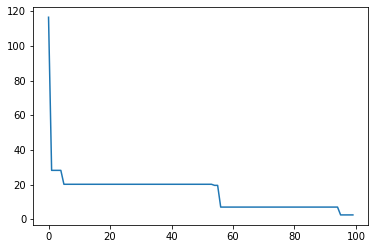

In [122]:
melhor_i=[]
sem_evoluir = 100

for i in range(sem_evoluir):
    #segunda geracao
    if i==0:
        nova_melhor_pop = melhor_pop_inicial.copy()

        #novos 50% da população
        nova_pop = criaPop(int(n_pop/2),dim)
        
        #converter para as faixas
        nova_pop = converter1(nova_pop)
        
        #fitness da nova população
        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        #melhor 50% pop anterior + 50% nova população
        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        #reordena
        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]
    
        #melhor individuo dessa geração
        melhor_i.append(melhor_pop[0:1,-1])
        
    #gerações posteriores
    elif i>0:
        nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

        nova_pop = criaPop(int(n_pop/2),dim)

        nova_pop = converter1(nova_pop)
        
        nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

        nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

        melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, 3].argsort()]

        #melhores individuos da geração
        melhor_i.append(melhor_pop[0:1,-1])

        evolucao = estagnacao(melhor_i[i-1],melhor_i[i])
        
        if evolucao <= delta:
            cont += 1
            
        elif evolucao >= delta:
            cont=0
        
        elif evolucao == cont:
            break
print('Número de iterações: ',i)
    
#media e desvio padrao dos fits
media = sum(melhor_i)/len(melhor_i)
desvioP = np.std(melhor_i,axis=0)
melhor_i = np.array(melhor_i)
melhor_i
plt.plot(melhor_i)

## Segundo caso de teste

In [87]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

npop2 = np.size(palavraAlvo)

In [84]:
def criaPalavra():
    palavra = np.random.uniform(low=0, high=1, size=np.size(palavraAlvo)) #np.size(palavraAlvo)
    palavra = np.round_(palavra, decimals = 3)
    #!!COLOCAR EM OUTRA FUNC!!
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [88]:
#palavra + fit
palavra = [criaPalavra()]
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[ 114.011924  , 3777.93688233],
       [  91.073927  , 1484.32410406],
       [ 106.885556  , 2952.67866817],
       [ 106.440158  , 2904.47247921],
       [  62.791154  ,  104.94269118],
       [ 124.627243  , 5195.56143094],
       [ 123.216816  , 4994.22289347],
       [ 111.784934  , 3509.13282459],
       [ 118.688603  , 4374.71164741],
       [  96.715635  , 1950.86831776],
       [  64.350047  ,  139.31191848],
       [  61.083795  ,   72.87686887],
       [  55.51632   ,    8.81686126],
       [ 108.295983  , 3107.94910553],
       [ 102.357343  , 2481.07026978],
       [  77.340822  ,  614.73360937],
       [  69.843289  ,  299.16161317],
       [  86.69418   , 1166.02990195],
       [  71.921813  ,  375.38337878],
       [  84.838355  , 1042.73160774],
       [  81.794802  ,  855.43392183],
       [ 121.360991  , 4735.36535735],
       [ 123.662214  , 5057.37366227],
       [  55.739019  ,   10.1889853 ],
       [ 111.784934  , 3509.13282459],
       [  76.227327  ,  5

In [89]:
#ordenação
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra = palavra_ord[0:int(npop2/2),:]
melhor_palavra

array([[  55.51632   ,    8.81686126],
       [  55.739019  ,   10.1889853 ],
       [  57.075213  ,   20.50471297],
       [  61.083795  ,   72.87686887],
       [  62.791154  ,  104.94269118],
       [  64.350047  ,  139.31191848],
       [  69.843289  ,  299.16161317],
       [  71.921813  ,  375.38337878],
       [  76.227327  ,  560.75788683],
       [  77.340822  ,  614.73360937],
       [  79.642045  ,  734.14146355],
       [  81.794802  ,  855.43392183],
       [  84.838355  , 1042.73160774],
       [  86.69418   , 1166.02990195],
       [  91.073927  , 1484.32410406]])

## Terceiro caso de teste